In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
df1 = pd.read_csv('adyen_file_1.csv')

In [3]:
df2 = pd.read_csv('adyen_file_2.csv')

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378388 entries, 0 to 378387
Data columns (total 10 columns):
creation_date      378388 non-null object
txid               378388 non-null int64
amount             378388 non-null object
scheme             378388 non-null object
avs                378388 non-null object
cvc                378388 non-null object
issuing_country    378388 non-null object
auth               378388 non-null int64
chargeback         378388 non-null int64
refusal            378388 non-null int64
dtypes: int64(4), object(6)
memory usage: 28.9+ MB


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189194 entries, 0 to 189193
Data columns (total 3 columns):
txid              189194 non-null int64
funding_source    189194 non-null object
currency_code     189194 non-null object
dtypes: int64(1), object(2)
memory usage: 4.3+ MB


In [6]:
df1.head()

,creation_date,txid,amount,scheme,avs,cvc,issuing_country,auth,chargeback,refusal
0,2019-08-31,-1,62.68,0,Yes,Yes,US,1,0,0
1,2019-08-31,13458888,55.39,0,Yes,Yes,US,1,0,0
2,2019-08-31,31160339,413.30,0,Yes,Yes,US,1,0,0
3,2019-08-31,39297889,712.00,mc,Yes,Yes,SE,1,0,0
4,2019-08-31,38608158,262.87,mc,Yes,Yes,US,1,0,0


In [7]:
df2.head()

,txid,funding_source,currency_code
0,31192331,DEBIT,BRL
1,12512484,DEBIT,BRL
2,26217282,DEBIT,BRL
3,31567208,DEBIT,BRL
4,-1,DEBIT,BRL


In [8]:
df1['amount'] = df1['amount'].apply(lambda x: x.replace(',',''))
df1['amount'] = pd.to_numeric(df1['amount'])

# Exercise 1A: Remove txid = -1

In [9]:
df1 = df1[df1['txid'] != -1]

In [10]:
df1.head()

,creation_date,txid,amount,scheme,avs,cvc,issuing_country,auth,chargeback,refusal
1,2019-08-31,13458888,55.39,0,Yes,Yes,US,1,0,0
2,2019-08-31,31160339,413.30,0,Yes,Yes,US,1,0,0
3,2019-08-31,39297889,712.00,mc,Yes,Yes,SE,1,0,0
4,2019-08-31,38608158,262.87,mc,Yes,Yes,US,1,0,0
7,2019-08-31,34579337,56.90,0,Yes,Yes,US,1,0,0


In [11]:
df2 = df2[df2['txid'] != -1]

In [12]:
df2.head()

,txid,funding_source,currency_code
0,31192331,DEBIT,BRL
1,12512484,DEBIT,BRL
2,26217282,DEBIT,BRL
3,31567208,DEBIT,BRL
5,18379053,PREPAID,BRL


# Exercise 1B: Replacing 0's with Visa

In [13]:
df1['scheme'] = df1['scheme'].apply(lambda x: 'visa' if x == '0' else x)

In [14]:
df1.head()

,creation_date,txid,amount,scheme,avs,cvc,issuing_country,auth,chargeback,refusal
1,2019-08-31,13458888,55.39,visa,Yes,Yes,US,1,0,0
2,2019-08-31,31160339,413.30,visa,Yes,Yes,US,1,0,0
3,2019-08-31,39297889,712.00,mc,Yes,Yes,SE,1,0,0
4,2019-08-31,38608158,262.87,mc,Yes,Yes,US,1,0,0
7,2019-08-31,34579337,56.90,visa,Yes,Yes,US,1,0,0


# Exercise 1C: Removing duplicates

In [15]:
df1.tail()

,creation_date,txid,amount,scheme,avs,cvc,issuing_country,auth,chargeback,refusal
378381,2019-06-01,29700872,25.66,visa,Yes,Yes,US,1,0,0
378384,2019-06-01,25076392,71.65,visa,Yes,Yes,US,1,0,0
378385,2019-06-01,32214725,344.00,visa,Yes,Yes,BR,1,0,0
378386,2019-06-01,33745771,42.40,visa,Yes,Yes,US,1,0,0
378387,2019-06-01,37051710,85.00,mc,Yes,Yes,US,0,0,1


In [16]:
df1.drop_duplicates('txid', inplace=True)

In [17]:
df1.tail()

,creation_date,txid,amount,scheme,avs,cvc,issuing_country,auth,chargeback,refusal
189187,2019-06-01,29700872,25.66,visa,Yes,Yes,US,1,0,0
189190,2019-06-01,25076392,71.65,visa,Yes,Yes,US,1,0,0
189191,2019-06-01,32214725,344.00,visa,Yes,Yes,BR,1,0,0
189192,2019-06-01,33745771,42.40,visa,Yes,Yes,US,1,0,0
189193,2019-06-01,37051710,85.00,mc,Yes,Yes,US,0,0,1


In [18]:
# ---

In [19]:
df2.tail()

,txid,funding_source,currency_code
189183,33236043,CREDIT,BRL
189184,21673972,CREDIT,USD
189185,32626041,CREDIT,USD
189189,27076092,CREDIT,USD
189191,14374823,CREDIT,EUR


In [20]:
df2.drop_duplicates('txid', inplace=True)

In [21]:
df2.tail()

,txid,funding_source,currency_code
189183,33236043,CREDIT,BRL
189184,21673972,CREDIT,USD
189185,32626041,CREDIT,USD
189189,27076092,CREDIT,USD
189191,14374823,CREDIT,EUR


# Exercise 1D: Combining adyen_file_1 and adyen_file_2

In [22]:
df_merge = pd.merge(df1, df2, how='inner', on='txid')

In [23]:
df_merge.head()

,creation_date,txid,amount,scheme,avs,cvc,issuing_country,auth,chargeback,refusal,funding_source,currency_code
0,2019-08-31,13458888,55.39,visa,Yes,Yes,US,1,0,0,CREDIT,USD
1,2019-08-31,31160339,413.30,visa,Yes,Yes,US,1,0,0,CREDIT,USD
2,2019-08-31,39297889,712.00,mc,Yes,Yes,SE,1,0,0,CREDIT,SEK
3,2019-08-31,38608158,262.87,mc,Yes,Yes,US,1,0,0,CREDIT,USD
4,2019-08-31,34579337,56.90,visa,Yes,Yes,US,1,0,0,CREDIT,USD


# Exercise 2A: Calculate Authorization Rate

# Answer: 83.32%

In [24]:
df_merge['auth'].value_counts()

1    117825
0     23586
Name: auth, dtype: int64

In [25]:
sum(df_merge['auth']) / df_merge['txid'].count()

0.8332095805842544

In [26]:
# ------------------------------------------------------------------------------------------------------------

# Exercise 2B: Authorized tx count by scheme

In [27]:
df_merge['scheme'].value_counts()

visa    87071
mc      54340
Name: scheme, dtype: int64

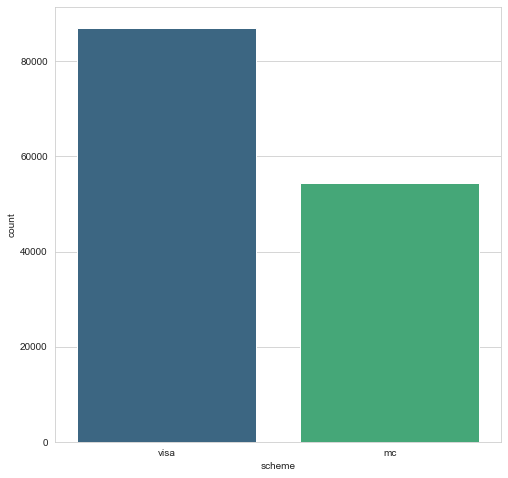

In [28]:
plt.figure(figsize=(8,8))
sns.countplot(x='scheme', data=df_merge, palette='viridis')


In [29]:
# ------------------------------------------------------------------------------------------------------------

# Exercise 2C: Percentage total of credit card transaction by currency

In [30]:
# CC Percentage based on individual countries

In [31]:
curr_code = df_merge['currency_code'].unique()

for curr in curr_code:
    curr_df = df_merge[df_merge['currency_code'] == curr]
    curr_cc = curr_df[curr_df['funding_source'] == 'CREDIT']['txid'].count()
    total_tx = curr_df['txid'].count()
    print(f"{curr} CC Percentage: {round(curr_cc/total_tx, 4)}")
    
    

USD CC Percentage: 0.5599
SEK CC Percentage: 0.6757
CHF CC Percentage: 0.8047
EUR CC Percentage: 0.3809
CAD CC Percentage: 0.8764
BRL CC Percentage: 0.9932
NOK CC Percentage: 0.3123
DKK CC Percentage: 0.7159
GBP CC Percentage: 0.292
JPY CC Percentage: 0.9379


In [32]:
# CC Percentage based on the CC population as a whole

In [33]:
curr_code = df_merge['currency_code'].unique()

for curr in curr_code:
    curr_df = df_merge[df_merge['currency_code'] == curr]
    curr_cc = curr_df[curr_df['funding_source'] == 'CREDIT']['txid'].count()
    pop_txid = df_merge[df_merge['funding_source'] == 'CREDIT']['txid'].count()
    print(f"{curr} CC Percentage: {round(curr_cc/pop_txid, 4)}")
    
    

USD CC Percentage: 0.6043
SEK CC Percentage: 0.0135
CHF CC Percentage: 0.004
EUR CC Percentage: 0.0672
CAD CC Percentage: 0.0748
BRL CC Percentage: 0.2128
NOK CC Percentage: 0.0013
DKK CC Percentage: 0.0058
GBP CC Percentage: 0.0099
JPY CC Percentage: 0.0065


In [34]:
# ------------------------------------------------------------------------------------------------------------

# Exercise 2D: Average transaction value by scheme and currency

# Scroll down until you find "2D Solution here!!!"

# Most of this was exploratory analysis for Exercise 3

## By scheme and transaction

In [36]:
approved_transactions = df_merge[df_merge['auth'] == 1]
unapproved_transactions = df_merge[df_merge['auth'] == 0]

In [37]:
total_visa = df_merge[df_merge['scheme'] == 'visa']
approved_visa = approved_transactions[approved_transactions['scheme'] == 'visa']

In [38]:
df_mc = df_merge[df_merge['scheme'] == 'mc']
approved_mc = approved_transactions[approved_transactions['scheme'] == 'mc']

### By Visa and Currency

In [39]:
visa_curr_avg = total_visa.groupby('currency_code').mean()
visa_curr_avg

,txid,amount,auth,chargeback,refusal
currency_code,,,,,
BRL,2.513382e+07,526.562131,0.703234,0.009973,0.296766
CAD,2.488560e+07,116.687211,0.906270,0.000850,0.093730
CHF,2.589541e+07,178.199137,0.798561,0.000000,0.201439
DKK,2.507895e+07,891.340788,0.679803,0.000000,0.320197
EUR,2.489436e+07,132.661267,0.829543,0.001360,0.170457
GBP,2.505318e+07,125.256602,0.807640,0.000000,0.192360
JPY,2.495042e+07,16615.698598,0.467290,0.000000,0.532710
NOK,2.538285e+07,1173.876935,0.895161,0.000000,0.104839
SEK,2.518710e+07,1230.632819,0.895062,0.000000,0.104938


In [40]:
approved_visa_curr_avg = approved_visa.groupby('currency_code').mean()
approved_visa_curr_avg

,txid,amount,auth,chargeback,refusal
currency_code,,,,,
BRL,2.511572e+07,417.761169,1.0,0.014181,0.0
CAD,2.489428e+07,112.815117,1.0,0.000938,0.0
CHF,2.547567e+07,181.704144,1.0,0.000000,0.0
DKK,2.439100e+07,810.763696,1.0,0.000000,0.0
EUR,2.487232e+07,117.855759,1.0,0.001639,0.0
GBP,2.518038e+07,107.395220,1.0,0.000000,0.0
JPY,2.557372e+07,9988.095000,1.0,0.000000,0.0
NOK,2.519468e+07,1108.980991,1.0,0.000000,0.0
SEK,2.517217e+07,1213.290920,1.0,0.000000,0.0


In [41]:
# Note: Japan is an outlier in terms of amounts

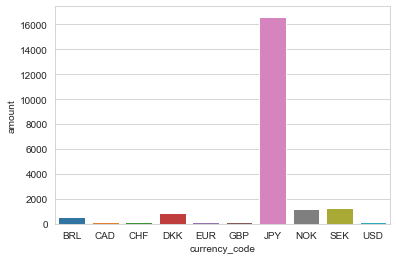

In [42]:
sns.barplot(x='currency_code', y='amount', data=visa_curr_avg.reset_index())

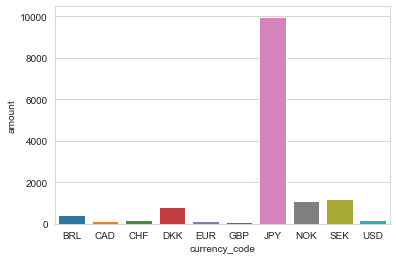

In [43]:
sns.barplot(x='currency_code', y='amount', data=approved_visa_curr_avg.reset_index())

In [44]:
# Difference between Approved Avg Amounts - Total Avg Amount
# Japan is an outlier. Could be due to JPY being in larger denominations. 

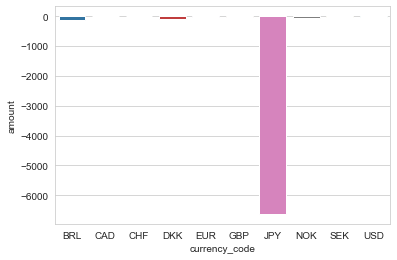

In [45]:
sns.barplot(x='currency_code', y='amount', data=(approved_visa_curr_avg['amount'] - visa_curr_avg['amount']).reset_index())

In [46]:
# Removed Japan temporarily to see impact across other currencies
# For the most part, if unauthorized transactions are removed, you get a smaller

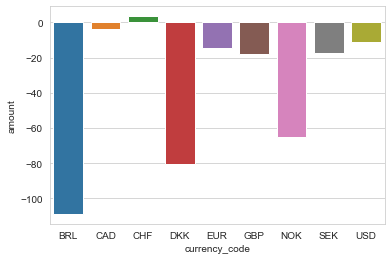

In [47]:
sns.barplot(x='currency_code', y='amount', data=(approved_visa_curr_avg['amount'] - visa_curr_avg['amount']).drop('JPY').reset_index())

### By MC and currency

In [48]:
mc_curr_avg = df_mc.groupby('currency_code').mean()
mc_curr_avg

,txid,amount,auth,chargeback,refusal
currency_code,,,,,
BRL,2.515407e+07,451.902305,0.780619,0.013580,0.219381
CAD,2.515042e+07,114.503847,0.914179,0.000373,0.085821
CHF,2.448363e+07,150.643252,0.860140,0.000000,0.139860
DKK,2.481534e+07,1102.039291,0.813765,0.000000,0.186235
EUR,2.508599e+07,132.433334,0.822702,0.000000,0.177298
GBP,2.501325e+07,165.316644,0.867403,0.000000,0.132597
JPY,2.605568e+07,14345.901369,0.452381,0.000000,0.547619
NOK,2.359067e+07,1689.230598,0.897436,0.000000,0.102564
SEK,2.467423e+07,1231.215878,0.886929,0.000000,0.113071


In [49]:
approved_mc_curr_avg = approved_mc.groupby('currency_code').mean()
approved_mc_curr_avg

,txid,amount,auth,chargeback,refusal
currency_code,,,,,
BRL,2.512684e+07,376.690060,1.0,0.017397,0.0
CAD,2.505026e+07,112.308420,1.0,0.000408,0.0
CHF,2.447492e+07,155.599268,1.0,0.000000,0.0
DKK,2.479725e+07,1137.012736,1.0,0.000000,0.0
EUR,2.511153e+07,119.887586,1.0,0.000000,0.0
GBP,2.502472e+07,134.265143,1.0,0.000000,0.0
JPY,2.520442e+07,9944.729342,1.0,0.000000,0.0
NOK,2.310040e+07,1479.237905,1.0,0.000000,0.0
SEK,2.456464e+07,1207.170217,1.0,0.000000,0.0


In [50]:
# Difference between Approved Avg Amounts - Total Avg Amount
# Japan is an outlier. Could be due to JPY being in larger denominations. 

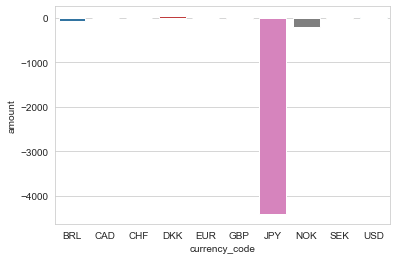

In [51]:
sns.barplot(x='currency_code', y='amount', data=(approved_mc_curr_avg['amount'] - mc_curr_avg['amount']).reset_index())

In [52]:
# Removed Japan temporarily to see impact across other currencies
# Approved CAD, CHF, DKK, USD average transactions are larger if unauthorized transactions are removed

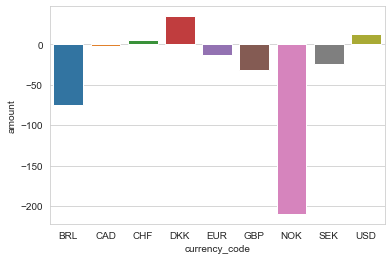

In [53]:
sns.barplot(x='currency_code', y='amount', data=(approved_mc_curr_avg['amount'] - mc_curr_avg['amount']).drop('JPY').reset_index())

### Average transaction value by currency only 

In [54]:
df_by_currency = df_merge.groupby('currency_code').mean()
df_by_currency

,txid,amount,auth,chargeback,refusal
currency_code,,,,,
BRL,2.514685e+07,478.542664,0.753006,0.012293,0.246994
CAD,2.498170e+07,115.894873,0.909140,0.000677,0.090860
CHF,2.494537e+07,159.655647,0.840000,0.000000,0.160000
DKK,2.489211e+07,1040.673730,0.774749,0.000000,0.225251
EUR,2.498446e+07,132.554092,0.826326,0.000720,0.173674
GBP,2.504338e+07,135.091621,0.822313,0.000000,0.177687
JPY,2.526197e+07,15975.889983,0.463087,0.000000,0.536913
NOK,2.480837e+07,1339.072493,0.895890,0.000000,0.104110
SEK,2.481806e+07,1231.052366,0.889209,0.000000,0.110791


In [55]:
approved_df_by_currency = approved_transactions.groupby('currency_code').mean()
approved_df_by_currency

,txid,amount,auth,chargeback,refusal
currency_code,,,,,
BRL,2.512313e+07,390.376509,1.0,0.016325,0.0
CAD,2.495120e+07,112.630219,1.0,0.000745,0.0
CHF,2.478608e+07,163.715910,1.0,0.000000,0.0
DKK,2.469343e+07,1053.637981,1.0,0.000000,0.0
EUR,2.498431e+07,118.806940,1.0,0.000872,0.0
GBP,2.514007e+07,114.353699,1.0,0.000000,0.0
JPY,2.547203e+07,9976.153732,1.0,0.000000,0.0
NOK,2.452221e+07,1227.870826,1.0,0.000000,0.0
SEK,2.473614e+07,1208.897995,1.0,0.000000,0.0


In [56]:
unapproved_df_by_currency = unapproved_transactions.groupby('currency_code').mean()
unapproved_df_by_currency

,txid,amount,auth,chargeback,refusal
currency_code,,,,,
BRL,2.521914e+07,747.332997,0.0,0.0,1.0
CAD,2.528691e+07,148.560879,0.0,0.0,1.0
CHF,2.578165e+07,138.339265,0.0,0.0,1.0
DKK,2.557548e+07,996.083312,0.0,0.0,1.0
EUR,2.498520e+07,197.961923,0.0,0.0,1.0
GBP,2.459588e+07,231.063874,0.0,0.0,1.0
JPY,2.508079e+07,21150.662500,0.0,0.0,1.0
NOK,2.727091e+07,2295.992105,0.0,0.0,1.0
SEK,2.547553e+07,1408.864271,0.0,0.0,1.0


In [57]:
list(approved_df_by_currency['amount'])

[390.37650866389197,
 112.63021894548632,
 163.71591036414569,
 1053.6379814814807,
 118.80694008558804,
 114.35369896906889,
 9976.153731884056,
 1227.870825688073,
 1208.8979948085619,
 164.65471964686134]

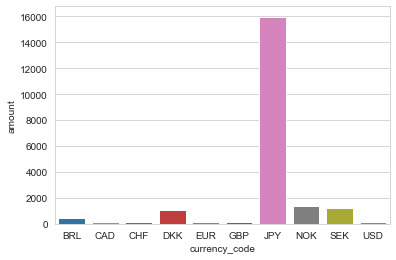

In [58]:
    sns.barplot(x='currency_code', y='amount', data=df_by_currency.reset_index())

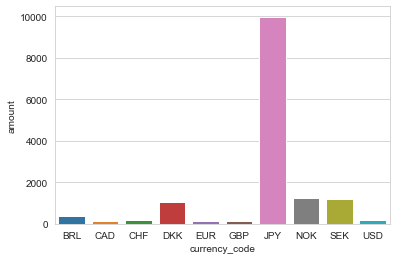

In [59]:
sns.barplot(x='currency_code', y='amount', data=approved_df_by_currency.reset_index())

In [60]:
# Difference between Auth Avg Amounts - Total Avg Amount
# Japan is an outlier. Could be due to JPY being in larger denominations. 

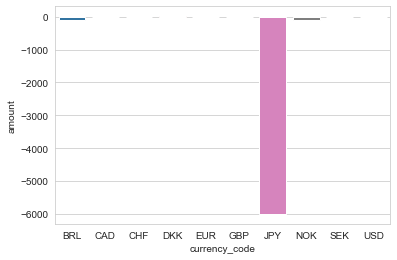

In [61]:
sns.barplot(x='currency_code', y='amount', data=(approved_df_by_currency['amount'] - df_by_currency['amount']).reset_index())

In [62]:
# Removed Japan temporarily to see impact across other currencies
# Looking at it from purely a currency standpoint, average transactions are lower if unauthorized transactions are removed
# The exception being in CHF, DKK

Text(0.5, 1.0, 'Difference between Avg Auth Amounts - Total Avg Amount')

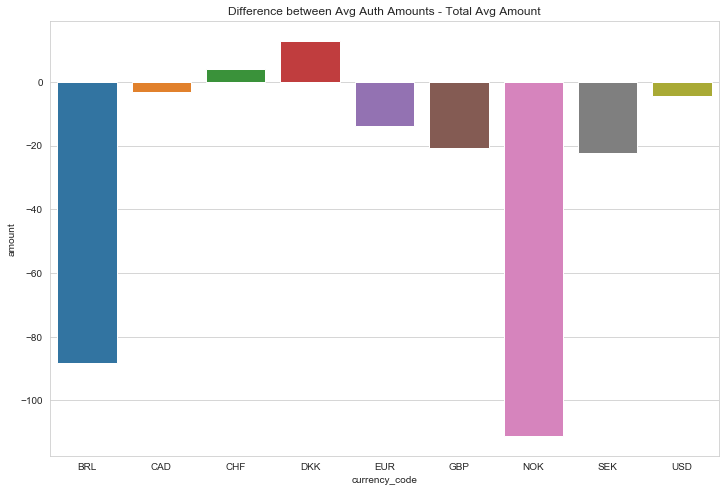

In [63]:
plt.figure(figsize=(12,8))
sns.barplot(x='currency_code', y='amount', data=(approved_df_by_currency['amount'] - df_by_currency['amount']).drop('JPY').reset_index()).set_title('Difference between Avg Auth Amounts - Total Avg Amount')

### Average transaction value by scheme only 

In [64]:
df_by_scheme = df_merge.groupby('scheme').mean()
df_by_scheme

,txid,amount,auth,chargeback,refusal
scheme,,,,,
mc,2.502738e+07,299.014654,0.755907,0.003662,0.244093
visa,2.500183e+07,282.829367,0.881453,0.001734,0.118547


In [65]:
approved_df_by_scheme = approved_transactions.groupby('scheme').mean()
approved_df_by_scheme

,txid,amount,auth,chargeback,refusal
scheme,,,,,
mc,2.500564e+07,266.218873,1.0,0.004845,0.0
visa,2.498348e+07,204.724840,1.0,0.001967,0.0


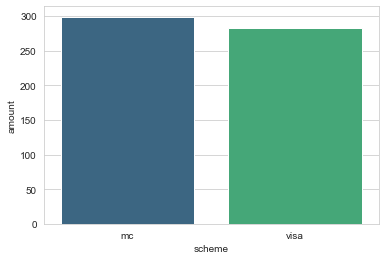

In [66]:
sns.barplot(x='scheme', y='amount', data=df_by_scheme.reset_index(), palette='viridis')

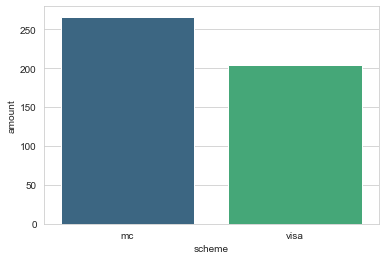

In [67]:
sns.barplot(x='scheme', y='amount', data=approved_df_by_scheme.reset_index(),palette='viridis')

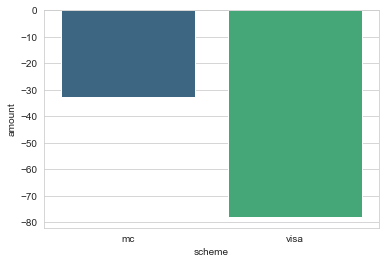

In [68]:
sns.barplot(x='scheme', y='amount', data=(approved_df_by_scheme['amount'] - df_by_scheme['amount']).reset_index(), palette='viridis')

# Solution for 2D Here !!!

# Above was exploratory analysis

# Solution is broken up by category

# Based on Authorized and Unauthorized transactions

In [69]:
pd.DataFrame(visa_curr_avg['amount'], visa_curr_avg.reset_index()['currency_code'])


,amount
currency_code,
BRL,526.562131
CAD,116.687211
CHF,178.199137
DKK,891.340788
EUR,132.661267
GBP,125.256602
JPY,16615.698598
NOK,1173.876935
SEK,1230.632819


In [70]:
pd.DataFrame(mc_curr_avg['amount'], visa_curr_avg.reset_index()['currency_code'])


,amount
currency_code,
BRL,451.902305
CAD,114.503847
CHF,150.643252
DKK,1102.039291
EUR,132.433334
GBP,165.316644
JPY,14345.901369
NOK,1689.230598
SEK,1231.215878


In [71]:
pd.DataFrame(df_by_currency['amount'], df_by_currency.reset_index()['currency_code'])


,amount
currency_code,
BRL,478.542664
CAD,115.894873
CHF,159.655647
DKK,1040.673730
EUR,132.554092
GBP,135.091621
JPY,15975.889983
NOK,1339.072493
SEK,1231.052366


In [72]:
pd.DataFrame(df_by_scheme['amount'], df_by_scheme.reset_index()['scheme'])


,amount
scheme,
mc,299.014654
visa,282.829367


# Based on Authorized Transactions only

In [73]:
pd.DataFrame(approved_visa_curr_avg['amount'], approved_visa_curr_avg.reset_index()['currency_code'])


,amount
currency_code,
BRL,417.761169
CAD,112.815117
CHF,181.704144
DKK,810.763696
EUR,117.855759
GBP,107.395220
JPY,9988.095000
NOK,1108.980991
SEK,1213.290920


In [74]:
pd.DataFrame(approved_mc_curr_avg['amount'], approved_mc_curr_avg.reset_index()['currency_code'])


,amount
currency_code,
BRL,376.690060
CAD,112.308420
CHF,155.599268
DKK,1137.012736
EUR,119.887586
GBP,134.265143
JPY,9944.729342
NOK,1479.237905
SEK,1207.170217


In [75]:
pd.DataFrame(approved_df_by_currency['amount'], approved_df_by_currency.reset_index()['currency_code'])


,amount
currency_code,
BRL,390.376509
CAD,112.630219
CHF,163.715910
DKK,1053.637981
EUR,118.806940
GBP,114.353699
JPY,9976.153732
NOK,1227.870826
SEK,1208.897995


In [76]:
pd.DataFrame(approved_df_by_scheme['amount'], approved_df_by_scheme.reset_index()['scheme'])


,amount
scheme,
mc,266.218873
visa,204.724840


# Exercise 3: Improve authorization rate

In [77]:
df_merge[df_merge['auth'] == 1].groupby('currency_code').count()['amount']

currency_code
BRL    13966
CAD     6714
CHF      357
DKK      540
EUR    12618
GBP     2425
JPY      276
NOK      327
SEK     1541
USD    79061
Name: amount, dtype: int64

In [78]:
df_auth_rate =  pd.DataFrame(data=df_merge.groupby('currency_code').sum()['auth'], index=df_merge.groupby('currency_code').count()['auth'].reset_index()['currency_code'] )
df_auth_rate['txid'] = df_merge.groupby('currency_code').count()['txid']
df_auth_rate['unauth'] = df_auth_rate['txid'] - df_auth_rate['auth']
df_auth_rate['Avg Auth Amount'] = df_merge[df_merge['auth'] == 1].groupby('currency_code').mean()['amount']
df_auth_rate['Avg UnAuth Amount'] = df_merge[df_merge['auth'] == 0].groupby('currency_code').mean()['amount']




In [79]:
def total_authorized(cols):
    auth = cols[0]
    txid = cols[1]
    return auth/txid

In [80]:
df_auth_rate['Pct Auth'] = (df_auth_rate[['auth', 'txid']].apply(total_authorized, axis=1))*100
df_auth_rate['Pct Unauth'] = 100-(df_auth_rate['Pct Auth'])
df_auth_rate['Pct Auth Pop'] = df_auth_rate['auth']/sum(df_merge['auth'] == 1)*100
df_auth_rate['Pct UnAuth Pop'] = df_auth_rate['unauth']/sum(df_merge['auth'] == 0)*100
df_auth_rate['Population Auth'] = sum(df_merge['auth'] == 1)
df_auth_rate['Population UnAuth'] = sum(df_merge['auth'] == 0)


In [81]:
df_auth_rate

,auth,txid,unauth,Avg Auth Amount,Avg UnAuth Amount,Pct Auth,Pct Unauth,Pct Auth Pop,Pct UnAuth Pop,Population Auth,Population UnAuth
currency_code,,,,,,,,,,,
BRL,13966,18547,4581,390.376509,747.332997,75.300588,24.699412,11.853172,19.422539,117825,23586
CAD,6714,7385,671,112.630219,148.560879,90.914015,9.085985,5.698281,2.844908,117825,23586
CHF,357,425,68,163.715910,138.339265,84.000000,16.000000,0.302992,0.288307,117825,23586
DKK,540,697,157,1053.637981,996.083312,77.474892,22.525108,0.458307,0.665649,117825,23586
EUR,12618,15270,2652,118.806940,197.961923,82.632613,17.367387,10.709102,11.243958,117825,23586
GBP,2425,2949,524,114.353699,231.063874,82.231265,17.768735,2.058137,2.221657,117825,23586
JPY,276,596,320,9976.153732,21150.662500,46.308725,53.691275,0.234246,1.356737,117825,23586
NOK,327,365,38,1227.870826,2295.992105,89.589041,10.410959,0.277530,0.161113,117825,23586
SEK,1541,1733,192,1208.897995,1408.864271,88.920946,11.079054,1.307872,0.814042,117825,23586


In [82]:
df_merge.groupby('currency_code').sum()

,txid,amount,auth,chargeback,refusal
currency_code,,,,,
BRL,466398548179,8875530.78,13966,228,4581
CAD,184489858853,855883.64,6714,5,671
CHF,10601781424,67853.65,357,0,68
DKK,17349804079,725349.59,540,0,157
EUR,381512728723,2024100.99,12618,11,2652
GBP,73852921158,398385.19,2425,0,524
JPY,15056132512,9521630.43,276,0,320
NOK,9055056138,488761.46,327,0,38
SEK,43009690090,2133413.75,1541,0,192


In [83]:
df_merge.columns

Index(['creation_date', 'txid', 'amount', 'scheme', 'avs', 'cvc',
       'issuing_country', 'auth', 'chargeback', 'refusal', 'funding_source',
       'currency_code'],
      dtype='object')

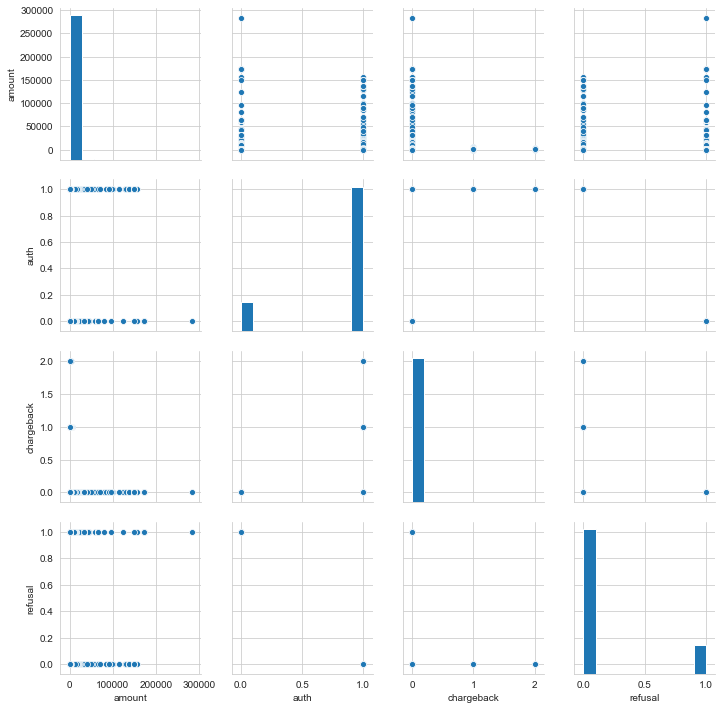

In [84]:
sns.pairplot(df_merge[['amount','scheme','issuing_country','auth','chargeback','refusal','funding_source','currency_code']])

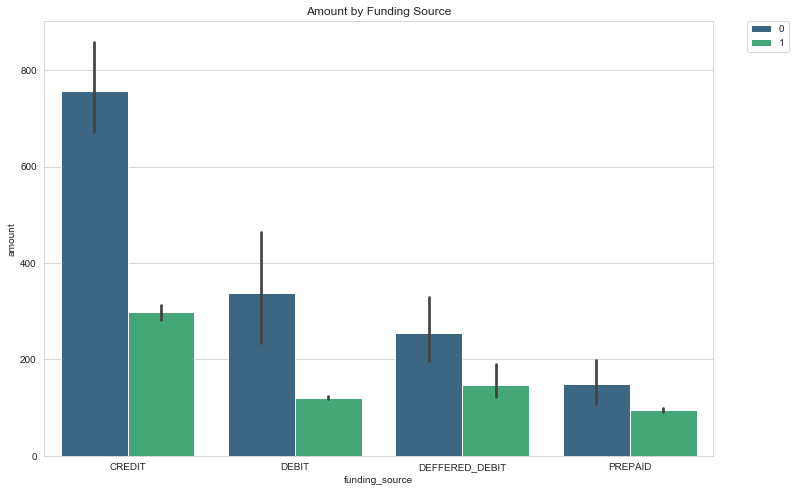

In [85]:
plt.figure(figsize=(12,8))
sns.barplot(y='amount',x='funding_source',data=df_merge, hue='auth', palette = 'viridis').set_title('Amount by Funding Source')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [86]:
countries = list(df_auth_rate.reset_index()['currency_code'])
Auth = list(df_auth_rate['Pct Auth'])
UnAuth = list(df_auth_rate['Pct Unauth'])

<Figure size 864x576 with 0 Axes>

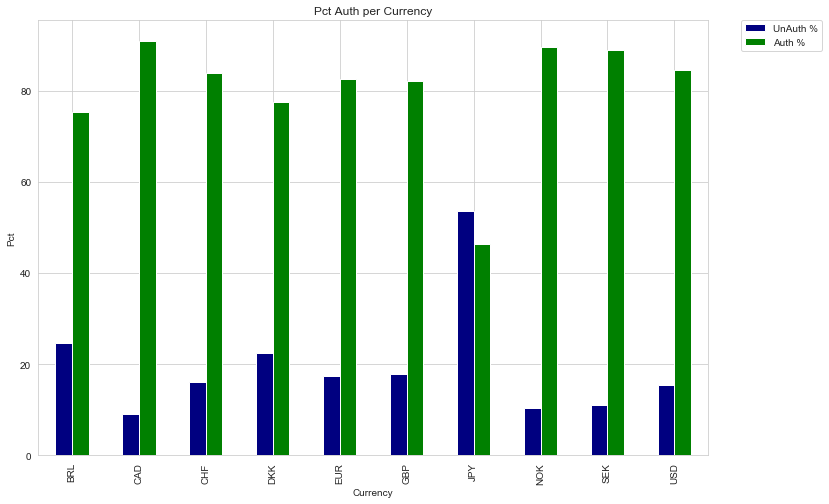

In [87]:
plt.figure(figsize=(12,8))

PctAuth = pd.Series(Auth, index=countries)
PctUnAuth = pd.Series(UnAuth, index=countries)

df = pd.DataFrame({"UnAuth %":PctUnAuth,"Auth %":PctAuth})
ax = df.plot.bar(color=['navy','green'], figsize=(12,8))
ax.set_xlabel("Currency")
ax.set_ylabel("Pct")
ax.set_title('Pct Auth per Currency')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)




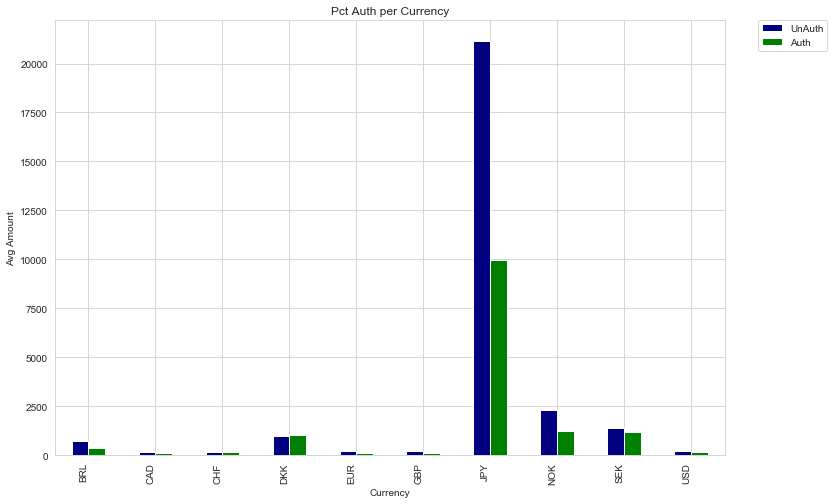

In [88]:

auth_curr_list = list(approved_df_by_currency['amount'])
unauth_curr_list = list(unapproved_df_by_currency['amount'])
                        
auth_curr = pd.Series(auth_curr_list, index=countries)
unauth_curr = pd.Series(unauth_curr_list, index=countries)

df = pd.DataFrame({"UnAuth":unauth_curr_list,"Auth":auth_curr_list})
ax = df.plot.bar(color=['navy','green'], figsize=(12,8))
ax.set_xlabel("Currency")
ax.set_ylabel("Avg Amount")
ax.set_title('Pct Auth per Currency')
locs, labels=plt.xticks()
x_ticks = []
new_xticks=[i for i in countries]
plt.xticks(locs,new_xticks, rotation=90, horizontalalignment='right')


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [89]:
countries.remove('JPY')

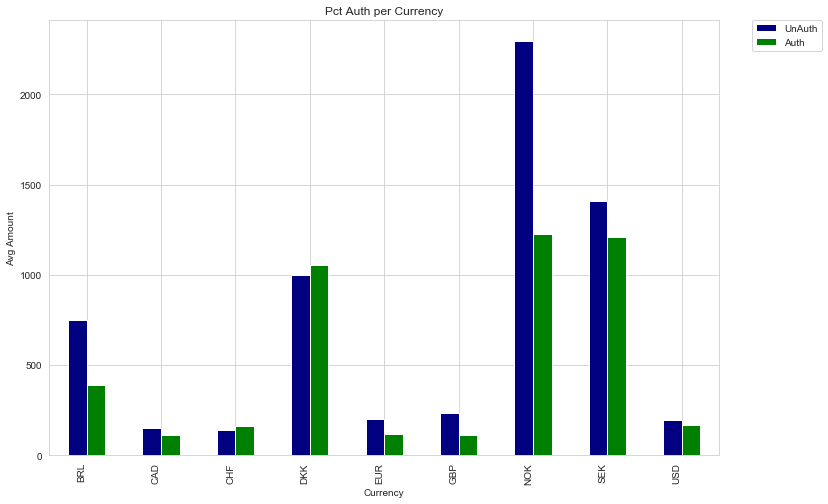

In [90]:

auth_curr_list = list(approved_df_by_currency.drop('JPY')['amount'])
unauth_curr_list = list(unapproved_df_by_currency.drop('JPY')['amount'])
                        
auth_curr = pd.Series(auth_curr_list, index=countries)
unauth_curr = pd.Series(unauth_curr_list, index=countries)

df = pd.DataFrame({"UnAuth":unauth_curr_list,"Auth":auth_curr_list})
ax = df.plot.bar(color=['navy','green'], figsize=(12,8))
ax.set_xlabel("Currency")
ax.set_ylabel("Avg Amount")
ax.set_title('Pct Auth per Currency')
locs, labels=plt.xticks()
x_ticks = []
new_xticks=[i for i in countries]
plt.xticks(locs,new_xticks, rotation=90, horizontalalignment='right')


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [91]:
approved_df_by_funding_source = approved_transactions.groupby('funding_source').mean()
unapproved_df_by_funding_source = unapproved_transactions.groupby('funding_source').mean()

In [92]:
funding_source = list(approved_df_by_funding_source.reset_index()['funding_source'])

In [93]:
approved_df_by_funding_source

,txid,amount,auth,chargeback,refusal
funding_source,,,,,
CREDIT,2.496662e+07,297.660347,1.0,0.004252,0.0
DEBIT,2.502037e+07,120.415725,1.0,0.001060,0.0
DEFFERED_DEBIT,2.490127e+07,147.888214,1.0,0.000000,0.0
PREPAID,2.519133e+07,94.138268,1.0,0.001420,0.0


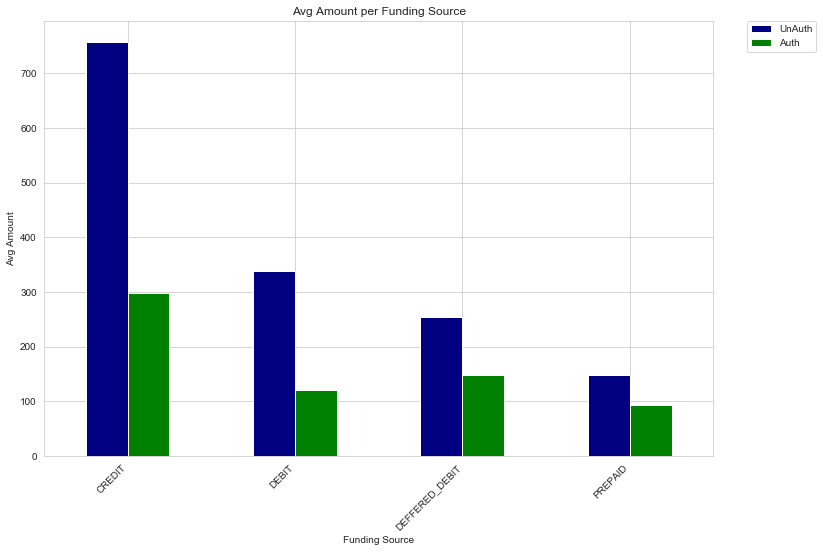

In [94]:
auth_funding_source = list(approved_df_by_funding_source['amount'])
unauth_funding_source = list(unapproved_df_by_funding_source['amount'])                      
                        
auth_curr = pd.Series(auth_funding_source, index=funding_source)
unauth_curr = pd.Series(unauth_funding_source, index=funding_source)

df = pd.DataFrame({"UnAuth":unauth_funding_source,"Auth":auth_funding_source})
ax = df.plot.bar(color=['navy','green'], figsize=(12,8))
ax.set_xlabel("Funding Source")
ax.set_ylabel("Avg Amount")
ax.set_title('Avg Amount per Funding Source')
locs, labels=plt.xticks()
x_ticks = []
new_xticks=[i for i in funding_source]
plt.xticks(locs,new_xticks, rotation=45, horizontalalignment='right')


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


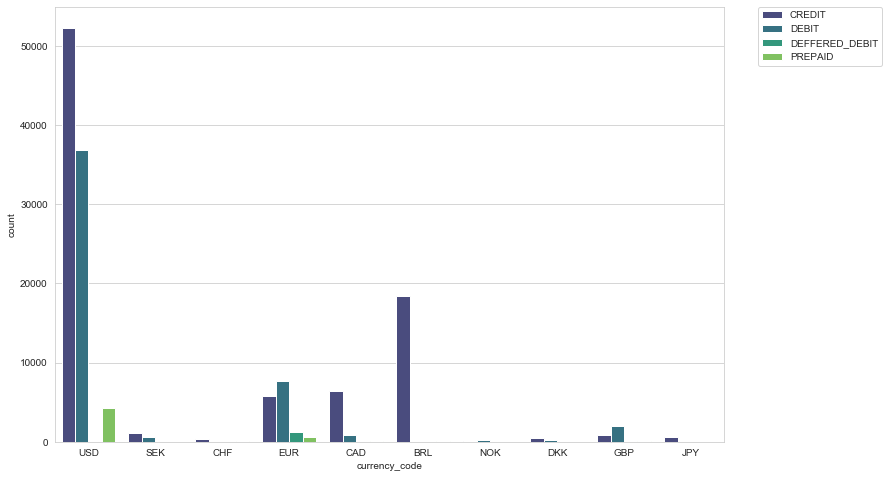

In [95]:
plt.figure(figsize=(12,8))
sns.countplot(x='currency_code', data=df_merge, hue='funding_source', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


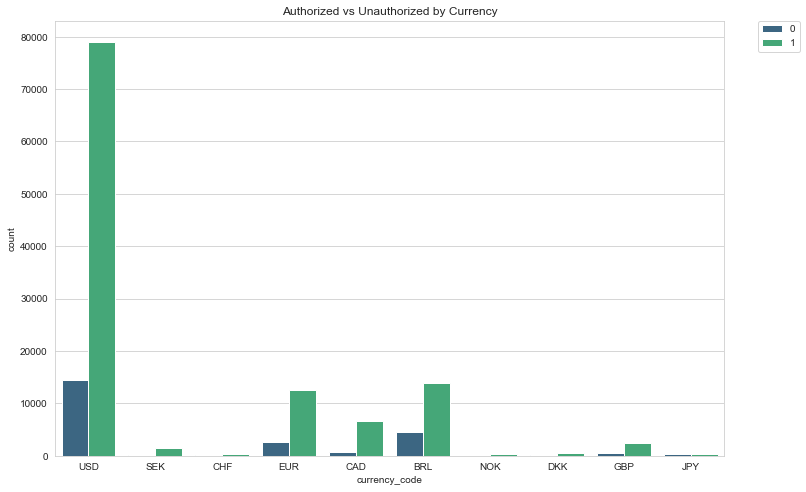

In [96]:
plt.figure(figsize=(12,8))
sns.countplot(x='currency_code', data=df_merge, hue='auth', palette='viridis').set_title('Authorized vs Unauthorized by Currency')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [97]:
countries

['BRL', 'CAD', 'CHF', 'DKK', 'EUR', 'GBP', 'NOK', 'SEK', 'USD']

# Features used to train model:

# amount, scheme, funding_source, currency_code 

In [98]:
from sklearn.model_selection import train_test_split
df_merge.columns

Index(['creation_date', 'txid', 'amount', 'scheme', 'avs', 'cvc',
       'issuing_country', 'auth', 'chargeback', 'refusal', 'funding_source',
       'currency_code'],
      dtype='object')

In [99]:
df_tree = df_merge

In [100]:
df_tree['scheme'] = df_tree['scheme'].apply(lambda x: 1 if x == 'mc' else 0)

In [101]:
cat_feats = ['funding_source']

In [102]:
df_tree = pd.get_dummies(df_tree, columns=cat_feats, drop_first=True)

In [103]:
cat_feats_2 = ['currency_code']

In [104]:
df_tree = pd.get_dummies(df_tree, columns=cat_feats_2, drop_first=True)

In [105]:
df_tree.drop(['avs','cvc','creation_date','txid','issuing_country', 'chargeback', 'refusal'], axis=1, inplace=True)

In [106]:
X = df_tree.drop('auth',axis=1)
y = df_tree['auth']

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [108]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=500)

In [109]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [110]:
rfc_pred = rfc.predict(X_test)

In [111]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, rfc_pred))
print(classification_report(y_test, rfc_pred))

[[ 2825  3100]
 [ 1420 28008]]
              precision    recall  f1-score   support

           0       0.67      0.48      0.56      5925
           1       0.90      0.95      0.93     29428

    accuracy                           0.87     35353
   macro avg       0.78      0.71      0.74     35353
weighted avg       0.86      0.87      0.86     35353

